### **In this study, I will apply EDA on Amazon Reviews dataset**



---



---



In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
df = pd.read_csv('output/Amazon_reviews_processed_1.csv')
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,...,polarities,sentiment_score,review_category,stopwords,punctuation,hastags,numerics,upper,emoji,emoticon
0,US,53096575,R2I0T26SV0ELPP,0316219266,665813273,The Everything Store: Jeff Bezos and the Age o...,Books,1,4054,4756,...,"{'neg': 0.055, 'neu': 0.78, 'pos': 0.164, 'com...",positive,product,505,151,0,3,22,0,0
1,US,12637794,RZGFXZ2HYHHRA,1780671067,509449366,Secret Garden: An Inky Treasure Hunt and Color...,Books,5,3416,3449,...,"{'neg': 0.036, 'neu': 0.882, 'pos': 0.082, 'co...",positive,product,95,33,1,6,15,0,0
2,US,30381644,R25ITJRIMQW92F,0805096663,647864157,Killing Kennedy: The End of Camelot,Books,1,2893,3589,...,"{'neg': 0.17, 'neu': 0.779, 'pos': 0.052, 'com...",negetive,product,680,421,0,13,37,0,2
3,US,26445230,R2I37K23W0YCC9,1623363586,465642569,Thug Kitchen: The Official Cookbook: Eat Like ...,Books,5,2746,2841,...,"{'neg': 0.0, 'neu': 0.841, 'pos': 0.159, 'comp...",positive,product,100,67,0,0,7,0,1
4,US,52830381,R2ATIJCX4DJWBB,1400069289,136914857,The Power of Habit: Why We Do What We Do in Li...,Books,1,2551,3021,...,"{'neg': 0.048, 'neu': 0.827, 'pos': 0.126, 'co...",positive,product,118,87,0,0,10,0,0


**Let's convert the 'review_date' column to a meaningful time format**  

In [3]:
df['review_date'] = pd.to_datetime(df['review_date'])
df['year']=df['review_date'].dt.year

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143230 entries, 0 to 1143229
Data columns (total 27 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   marketplace        1143230 non-null  object        
 1   customer_id        1143230 non-null  int64         
 2   review_id          1143230 non-null  object        
 3   product_id         1143230 non-null  object        
 4   product_parent     1143230 non-null  int64         
 5   product_title      1143230 non-null  object        
 6   product_category   1143230 non-null  object        
 7   star_rating        1143230 non-null  int64         
 8   helpful_votes      1143230 non-null  int64         
 9   total_votes        1143230 non-null  int64         
 10  vine               1143230 non-null  object        
 11  verified_purchase  1143230 non-null  object        
 12  review_headline    1143230 non-null  object        
 13  review_body        1143230 

In [5]:
df.describe().round(1)

,customer_id,product_parent,star_rating,helpful_votes,total_votes,stopwords,punctuation,hastags,numerics,upper,emoji,emoticon,year
count,1143230.0,1143230.0,1143230.0,1143230.0,1143230.0,1143230.0,1143230.0,1143230.0,1143230.0,1143230.0,1143230.0,1143230.0,1143230.0
mean,29796857.7,500246947.5,3.0,5.1,7.0,45.0,23.9,0.0,0.4,3.5,0.0,0.1,2013.6
std,15315084.8,288002921.2,1.4,19.2,22.0,81.8,58.3,0.3,1.4,7.9,0.1,0.4,1.0
min,10135.0,5710.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2012.0
25%,15775476.5,251905084.0,2.0,1.0,1.0,12.0,4.0,0.0,0.0,1.0,0.0,0.0,2013.0
50%,29348325.0,501126142.0,3.0,2.0,3.0,23.0,9.0,0.0,0.0,2.0,0.0,0.0,2014.0
75%,44172192.8,748573501.0,4.0,5.0,7.0,48.0,22.0,0.0,0.0,4.0,0.0,0.0,2014.0
max,53096584.0,999997596.0,5.0,4054.0,4756.0,3609.0,7236.0,108.0,358.0,2941.0,56.0,87.0,2015.0


In [6]:
positive = df.loc[df.sentiment_score == "positive"]
negative = df.loc[df.sentiment_score == "negetive"]
neutral = df.loc[df.sentiment_score == "neutral"]

In [7]:
del df

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

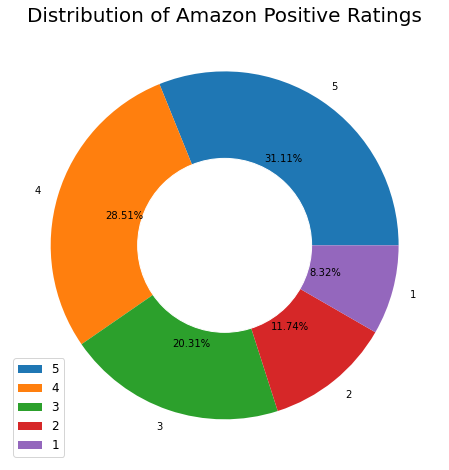

In [9]:
ratings = positive["star_rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

plt.figure(figsize=(10, 8))
plt.pie(quantity, labels=numbers, autopct = "%0.2f%%",)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Distribution of Amazon Positive Ratings", fontsize=20)
plt.legend()
plt.show()

**Observation:**<br><br>
1)Majority of Positive rating is under 4-5 star rating, we can say that SentimentIntensityAnalyzer performed well with 60% reviews correctly marked as Positive sentiment.<br>
2)Positive reviews are assumed to be under the 3-5 star rating but we can find they are also under 1,2 star rating, Such reviews are undesirabale and needs to be dropped from the dataset.

In [10]:
print(positive.head())
print(positive.shape)
positive = positive.loc[(positive.star_rating == 5) | (positive.star_rating == 4)] 
print(positive.shape)

  marketplace  customer_id       review_id  product_id  product_parent  \
0          US     53096575  R2I0T26SV0ELPP  0316219266       665813273   
1          US     12637794   RZGFXZ2HYHHRA  1780671067       509449366   
3          US     26445230  R2I37K23W0YCC9  1623363586       465642569   
4          US     52830381  R2ATIJCX4DJWBB  1400069289       136914857   
5          US     45630717   RPMW8FVG5H0ZW  1451695195       635355086   

                                       product_title product_category  \
0  The Everything Store: Jeff Bezos and the Age o...            Books   
1  Secret Garden: An Inky Treasure Hunt and Color...            Books   
3  Thug Kitchen: The Official Cookbook: Eat Like ...            Books   
4  The Power of Habit: Why We Do What We Do in Li...            Books   
5  Proof of Heaven: A Neurosurgeon's Journey into...            Books   

   star_rating  helpful_votes  total_votes  ... sentiment_score  \
0            1           4054         4756  ...  

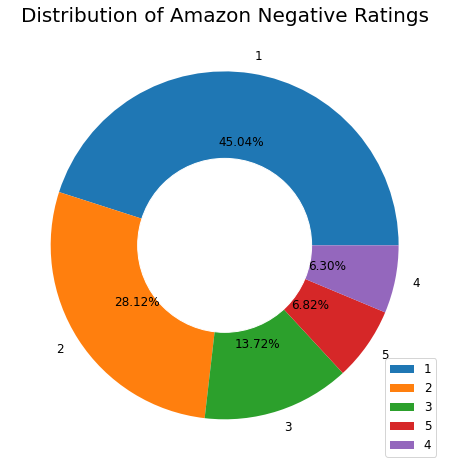

In [11]:
ratings = negative["star_rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

plt.figure(figsize=(10, 8))
plt.pie(quantity, labels=numbers, autopct = "%0.2f%%",)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Distribution of Amazon Negative Ratings", fontsize=20)
plt.legend()
plt.show()

**Observation:**<br><br>
1)Majority of Negative rating is under 1-2 star rating, we can say that SentimentIntensityAnalyzer performed well with 73% reviews correctly marked as Negative sentiment.<br>
2)Negative reviews are assumed to be under the 1-2 star rating but we can find they are also under 5,4,3 star rating, Such reviews are undesirabale and needs to be dropped from the dataset.

In [12]:
print(negative.shape)
negative = negative.loc[(negative.star_rating == 1) | (negative.star_rating == 2)] 
print(negative.shape)
negative.loc[negative['sentiment_score'] == "negetive", 'sentiment_score'] = "negative"
negative

(174319, 27)
(127543, 27)


,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,...,sentiment_score,review_category,stopwords,punctuation,hastags,numerics,upper,emoji,emoticon,year
2,US,30381644,R25ITJRIMQW92F,0805096663,647864157,Killing Kennedy: The End of Camelot,Books,1,2893,3589,...,negative,product,680,421,0,13,37,0,2,2012
22,US,14309093,R3QP8TJLDSHAM2,030758836X,93816562,Gone Girl,Books,2,1368,1571,...,negative,product,76,21,0,2,7,0,0,2012
24,US,52434183,R25TXWKFEZBOO7,1572245190,2267268,Disarming the Narcissist: Surviving and Thrivi...,Books,1,1341,1417,...,negative,product,614,463,0,2,10,0,4,2012
41,US,49876127,R2ZA4NCC7EMX18,0982301820,765631054,10-Day Green Smoothie Cleanse: Lose Up to 15 P...,Books,1,1123,1340,...,negative,product,435,339,0,25,38,0,3,2014
74,US,25518381,R24I8TPGUFAX9S,0425255700,162400836,"Affliction (Anita Blake, Vampire Hunter)",Books,1,907,968,...,negative,product,799,803,0,2,147,0,2,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1143190,US,32994404,R37NCD8S7T8M10,1577667158,533062000,The Movie Idiom: Film as a Popular Art Form,Books,2,0,2,...,negative,product,12,11,0,0,0,0,0,2014
1143197,US,46163955,R3JEJUC9FPGP19,0674749308,462918454,Realities and Relationships: Soundings in Soci...,Books,2,0,2,...,negative,product,43,30,0,1,0,0,0,2014
1143199,US,13841936,R2O08704JT3W38,1499647522,896081238,Puppy Training Guide,Books,2,0,1,...,negative,product,10,4,0,0,0,0,0,2014
1143208,US,52098527,RWHJ06ZTNI1K5,193521232X,394218620,The Paris Herald: A Novel,Books,2,0,1,...,negative,product,13,9,0,0,0,0,0,2014


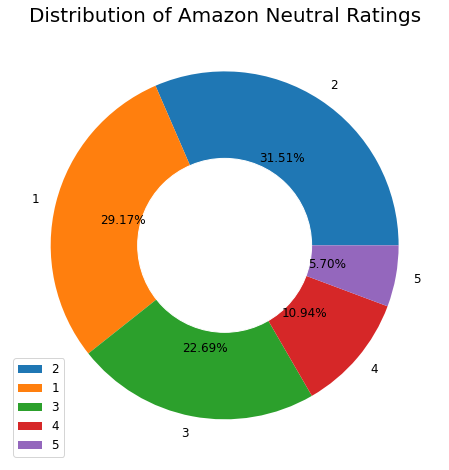

In [13]:
ratings = neutral["star_rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

plt.figure(figsize=(10, 8))
plt.pie(quantity, labels=numbers, autopct = "%0.2f%%",)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Distribution of Amazon Neutral Ratings", fontsize=20)
plt.legend()
plt.show()

**Observation:**<br><br>
1)Majority of Neutral rating is under 1-3 star rating, we can say that SentimentIntensityAnalyzer performed badly with only 23% reviews correctly marked as Neutral sentiment.<br>
2)Neutral reviews are assumed to be 3 star rating but we can find they are also under all star rating, Such reviews are undesirabale and needs to be dropped from the dataset.

In [14]:
print(neutral.shape)
neutral = neutral.loc[(neutral.star_rating == 3)] 
print(neutral.shape)

(333287, 27)
(75613, 27)


Combining proper segregated reviews into one dataset

In [15]:
df = pd.concat([positive, negative, neutral])

In [16]:
product = df.loc[df.review_category == "product"]
delivery = df.loc[df.review_category == "delivery"]
packaging = df.loc[df.review_category == "packaging"]

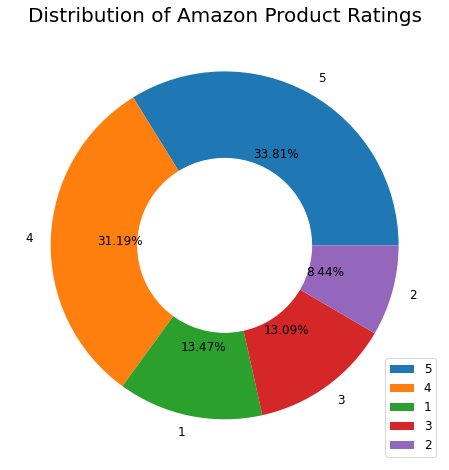

In [17]:
ratings = product["star_rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

plt.figure(figsize=(10, 8))
plt.pie(quantity, labels=numbers, autopct = "%0.2f%%",)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Distribution of Amazon Product Ratings", fontsize=20)
plt.legend()
plt.show()

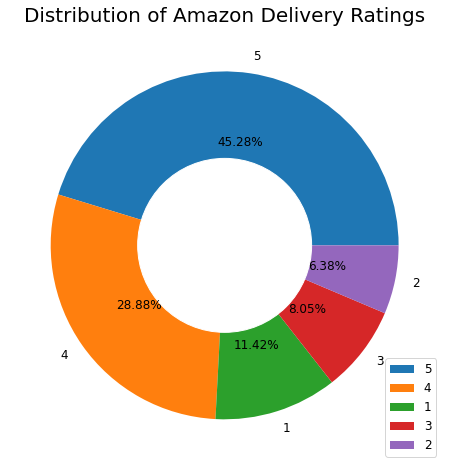

In [18]:
ratings = delivery["star_rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

plt.figure(figsize=(10, 8))
plt.pie(quantity, labels=numbers, autopct = "%0.2f%%",)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Distribution of Amazon Delivery Ratings", fontsize=20)
plt.legend()
plt.show()

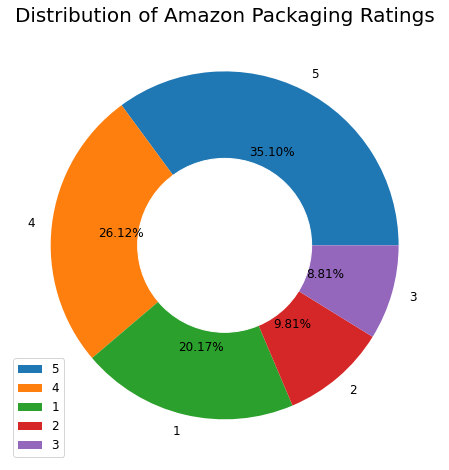

In [19]:
ratings = packaging["star_rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

plt.figure(figsize=(10, 8))
plt.pie(quantity, labels=numbers, autopct = "%0.2f%%",)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Distribution of Amazon Packaging Ratings", fontsize=20)
plt.legend()
plt.show()

In [20]:
yearly=df.groupby(['year'])['review_id'].count().reset_index()

In [21]:
yearly=yearly.rename(columns={'review_id': 'no_of_reviews'})
yearly

,year,no_of_reviews
0,2012,79638
1,2013,225296
2,2014,167590
3,2015,109611


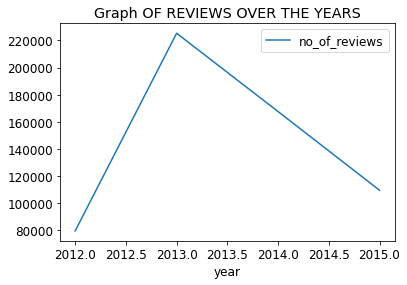

In [22]:
yearly.plot(x="year",y="no_of_reviews",kind="line",title="Graph OF REVIEWS OVER THE YEARS")
plt.show()

In [23]:
df1 = df[['helpful_votes','total_votes']]

<AxesSubplot:>

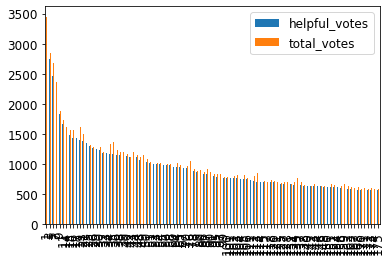

In [24]:
df1.head(100).plot.bar()

<AxesSubplot:ylabel='Frequency'>

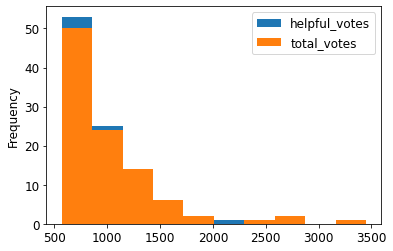

In [25]:
df1.head(100).plot.hist()

<AxesSubplot:>

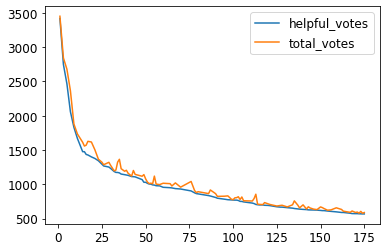

In [26]:
df1.head(100).plot()

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 582135 entries, 1 to 973254
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   marketplace        582135 non-null  object        
 1   customer_id        582135 non-null  int64         
 2   review_id          582135 non-null  object        
 3   product_id         582135 non-null  object        
 4   product_parent     582135 non-null  int64         
 5   product_title      582135 non-null  object        
 6   product_category   582135 non-null  object        
 7   star_rating        582135 non-null  int64         
 8   helpful_votes      582135 non-null  int64         
 9   total_votes        582135 non-null  int64         
 10  vine               582135 non-null  object        
 11  verified_purchase  582135 non-null  object        
 12  review_headline    582135 non-null  object        
 13  review_body        582135 non-null  object  

In [28]:
cols = ['marketplace', 'customer_id', 'product_id',
       'product_parent', 'product_title', 'product_category', 
       'helpful_votes', 'total_votes', 'vine', 'verified_purchase',
       'review_headline', 'review_body', 'polarities',
        'stopwords', 'punctuation',
       'hastags', 'numerics', 'upper', 'emoji', 'emoticon', 'year']
df.drop(cols, axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 582135 entries, 1 to 973254
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   review_id        582135 non-null  object        
 1   star_rating      582135 non-null  int64         
 2   review_date      582135 non-null  datetime64[ns]
 3   review           582135 non-null  object        
 4   sentiment_score  582135 non-null  object        
 5   review_category  582135 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 31.1+ MB


In [29]:
df.to_csv('output/Amazon_reviews_processed_2.csv', index=False)

In [31]:
del df

In [32]:
df = pd.read_csv('output/Amazon_reviews_processed_2.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582135 entries, 0 to 582134
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   review_id        582135 non-null  object
 1   star_rating      582135 non-null  int64 
 2   review_date      582135 non-null  object
 3   review           582135 non-null  object
 4   sentiment_score  582135 non-null  object
 5   review_category  582135 non-null  object
dtypes: int64(1), object(5)
memory usage: 26.6+ MB
